In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import os
import seaborn as sns
from miniaturize.viz import PAPER_STYLE_SHEET_PATH

# Load Style sheet
#plt.style.use(PAPER_STYLE_SHEET_PATH)


In [2]:
# Set up
dir_data = "data_generators"
file_names = ["generators_100-1000.pf","generators_2000.pf","generators_5000.pf"]

# Read data
df = pd.concat([pd.read_csv(os.path.join(dir_data,name)) for name in file_names],ignore_index=True)
df

,generator,time,memory,nodes,param1,param2,param3
0,gnp_random_graph,0.0036,0.091696,100,0.1,NaN,NaN
1,gnp_random_graph,0.0044,0.172432,100,0.2,NaN,NaN
2,gnp_random_graph,0.0056,0.231464,100,0.3,NaN,NaN
3,gnp_random_graph,0.0069,0.287856,100,0.4,NaN,NaN
4,gnp_random_graph,0.0086,0.389816,100,0.5,NaN,NaN
...,...,...,...,...,...,...,...
1624,watts_strogatz_graph,443.4153,2195.960184,5000,4500.0,0.5,NaN
1625,watts_strogatz_graph,508.8265,2195.960184,5000,4500.0,0.6,NaN
1626,watts_strogatz_graph,520.5945,2195.955024,5000,4500.0,0.7,NaN
1627,watts_strogatz_graph,661.1214,2195.960184,5000,4500.0,0.8,NaN


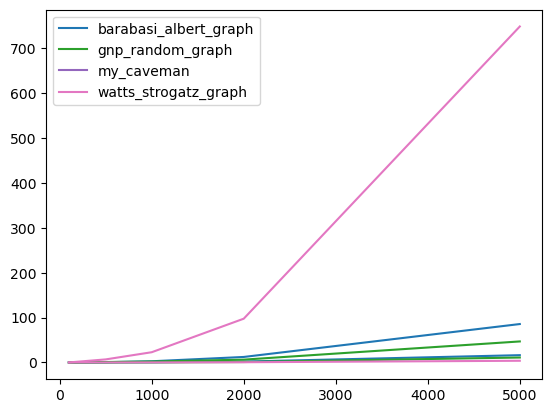

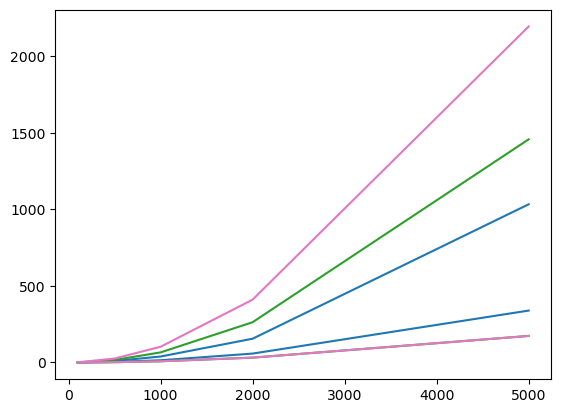

In [13]:
def plot_resource(ax,df,resource):
    generator_names = np.unique(df['generator'])


    for i,name in enumerate(generator_names):
        # Index to current generator data
        df_gen = df[df['generator'] == name]

        # Get sizes available
        sizes = np.unique(df_gen['nodes'])

        # Get the minimum and maximum allocation resources at each size
        min = []
        max = []

        for j,size in enumerate(sizes):
            # Get measurments to current resource
            x = df_gen[resource][df_gen['nodes'] == size]

            min.append(x.min())
            max.append(x.max())

        # Plot worst and best case scenarios
        artist_max = ax.plot(sizes,max)
        artist_min = ax.plot(sizes,min)

        artist_min[0].set_color(artist_max[0].get_color())
        artist_min[0].set_label(name)


fig, ax = plt.subplots(2,1)
plot_resource(ax[0,0],df,'time')
ax.legend()


